In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('YoutubeData.csv')
raw_data.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region
0,aaOB-ErYq6Y,2017-11-14,Waymo's fully self-driving cars are here,Waymo,2017-11-07,28,16:03:12,"self-driving car|""waymo""|""self-driving""|""drive...",665232,6485,714,2497,https://i.ytimg.com/vi/aaOB-ErYq6Y/default.jpg,False,False,False,"Waymo, which started as the Google self-drivin...",Science & Technology,Great Britan
1,XPrHD-7jjUs,2018-02-12,This Hidden 300 Foot Stretch Of The Berlin Wal...,VICE News,2018-02-05,25,17:15:48,"300 foot|""VICE News Tonight""|""VICE News""|""Berl...",52637,1005,51,132,https://i.ytimg.com/vi/XPrHD-7jjUs/default.jpg,False,False,False,The Berlin Wall was the ultimate symbol of the...,News & Politics,Great Britan
2,UOgNUOKYXiA,2018-05-13,Durga | Full Ep 1068 | 11th May 2018 | Odia Se...,Tarang TV,2018-05-12,24,06:00:01,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",87291,340,74,31,https://i.ytimg.com/vi/UOgNUOKYXiA/default.jpg,False,False,False,Durga: Story of a revengeful daughter who ente...,Entertainment,India
3,W1LO7Zk_38o,2018-02-01,ÐÐ«Ð¡ÐÐÐÐÐÐ ÐÐÐ®Ð¡ Â«ÐÐÐ ÐÐÐÐ¦Ð...,Sasha Sotnik,2018-01-29,25,16:00:05,"Ð¶Ð¸Ð»ÑÐµ|""Ð²ÑÑÐµÐ»ÐµÐ½Ð¸Ðµ""|""Ð°Ð²Ð°ÑÐ¸Ð¹Ð...",139389,11135,954,2903,https://i.ytimg.com/vi/W1LO7Zk_38o/default.jpg,False,False,False,ÐÑÐ°Ð¶Ð´Ð°Ð½Ðµ Ð Ð¾ÑÑÐ¸Ð¸ Ð¿ÑÐ¾Ð´Ð¾Ð»Ð¶Ð°...,News & Politics,Russia
4,BmEvz7tkoks,2018-01-14,"Amlo canta Las MaÃ±anitas a su esposa, por su ...",Viral Pancho,2018-01-13,27,23:36:07,"amlo|""pena nieto""|""elecciones 2018""|""politica ...",57778,3689,69,691,https://i.ytimg.com/vi/BmEvz7tkoks/default.jpg,False,False,False,Mexico va a votar por amlo por las propuestas ...,Education,Mexico


In [3]:
#Creating a column for number of days taken to trend
raw_data['publish_date']=pd.to_datetime(raw_data['publish_date'],format='%Y-%m-%d')
raw_data['trending_date']=pd.to_datetime(raw_data['trending_date'],format='%Y-%m-%d')
raw_data['timetotrend'] = (raw_data['trending_date']-raw_data['publish_date']).dt.days

In [4]:
#Creating a column for the hour video was uploaded on
time = pd.to_datetime(raw_data['publish_time'])
raw_data['hour'] = time.dt.hour

In [5]:
#Creating a new column which tells us the number of tags that the video has. 
raw_data['tag_counts'] = raw_data['tags'].str.split("|").apply(len)

In [6]:
#Mapping boolean to integer
raw_data.comments_disabled = raw_data.comments_disabled.astype(int)
raw_data.ratings_disabled = raw_data.ratings_disabled.astype(int)
raw_data.video_error_or_removed = raw_data.video_error_or_removed.astype(int)

In [7]:
#KEEPING THE VARIBALES OF INTEREST
df = raw_data.drop(['video_id' , 'trending_date' , 'channel_title' , 'publish_date' ,
                      'publish_time' ,'tags' , 'thumbnail_link' , 'description' , 'category_name'] , axis=1)

In [8]:
df.head()

,title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,region,timetotrend,hour,tag_counts
0,Waymo's fully self-driving cars are here,28,665232,6485,714,2497,0,0,0,Great Britan,7,16,14
1,This Hidden 300 Foot Stretch Of The Berlin Wal...,25,52637,1005,51,132,0,0,0,Great Britan,7,17,44
2,Durga | Full Ep 1068 | 11th May 2018 | Odia Se...,24,87291,340,74,31,0,0,0,India,1,6,15
3,ÐÐ«Ð¡ÐÐÐÐÐÐ ÐÐÐ®Ð¡ Â«ÐÐÐ ÐÐÐÐ¦Ð...,25,139389,11135,954,2903,0,0,0,Russia,3,16,40
4,"Amlo canta Las MaÃ±anitas a su esposa, por su ...",27,57778,3689,69,691,0,0,0,Mexico,1,23,6


# PRE-PROCESSING DATA

### Exploring the descriptive statistics of the variables

In [9]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include='all') #to include non-numeric data also

,title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,region,timetotrend,hour,tag_counts
count,375942,375942.00,375942.00,375942.00,375942.00,375942.00,375942.00,375942.00,375942.00,375942,375942.00,375942.00,375942.00
unique,188646,nan,nan,nan,nan,nan,nan,nan,nan,10,nan,nan,nan
top,Mission: Impossible - Fallout (2018) - Officia...,nan,nan,nan,nan,nan,nan,nan,nan,United States,nan,nan,nan
freq,100,nan,nan,nan,nan,nan,nan,nan,nan,40949,nan,nan,nan
mean,NaN,20.23,1326568.26,37884.31,2126.11,4253.78,0.02,0.02,0.00,NaN,7.50,12.77,17.26
std,NaN,7.13,7098567.72,165413.08,22484.37,25458.76,0.15,0.14,0.03,NaN,97.36,6.24,13.29
min,NaN,1.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,1.00
25%,NaN,17.00,46978.00,669.00,41.00,109.00,0.00,0.00,0.00,NaN,1.00,8.00,7.00
50%,NaN,23.00,177370.50,3446.00,179.00,511.00,0.00,0.00,0.00,NaN,1.00,14.00,15.00
75%,NaN,24.00,647679.25,17476.50,749.00,2011.00,0.00,0.00,0.00,NaN,3.00,17.00,25.00


In [10]:
#All distinct regions
countries = df['region'].unique()
countries 

array(['Great Britan', 'India', 'Russia', 'Mexico', 'Japan',
       'United States', 'France', 'Denmark', 'South Korea', 'Canada'],
      dtype=object)

### Checking for any missing values

In [11]:
df.isnull().sum()

title                     0
category_id               0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
region                    0
timetotrend               0
hour                      0
tag_counts                0
dtype: int64

Hence, no missing values. 

## Exploring the PDFs ( Probability Distribution Function ) (Country-Wise)

In [12]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature(variable)

# PDF of views

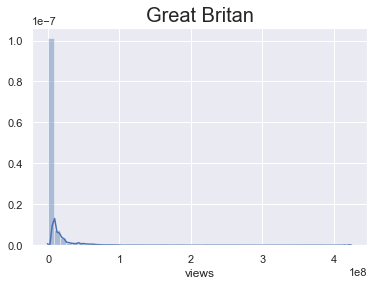

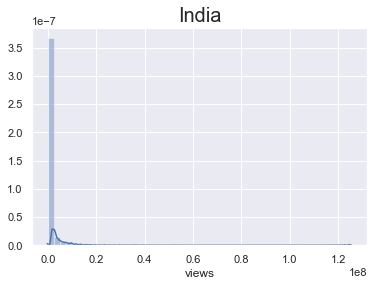

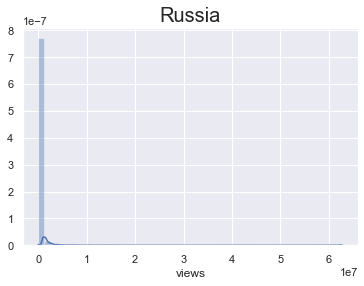

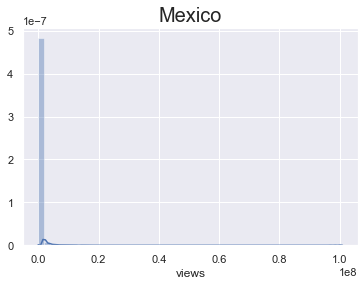

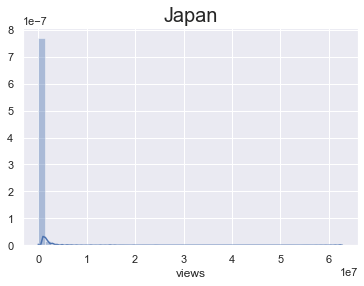

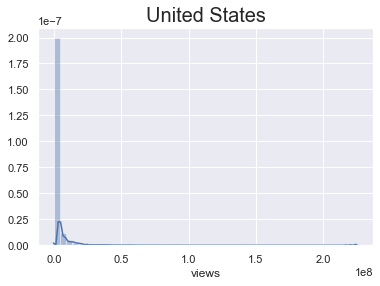

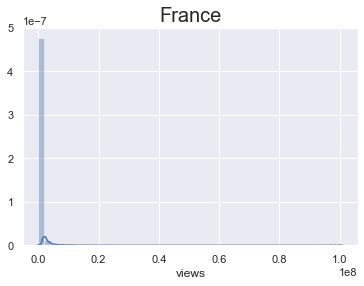

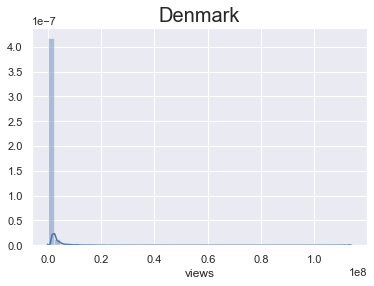

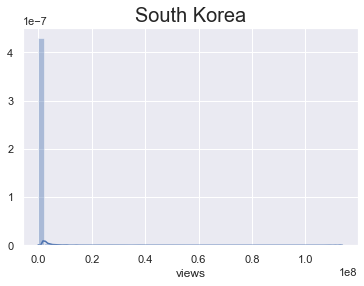

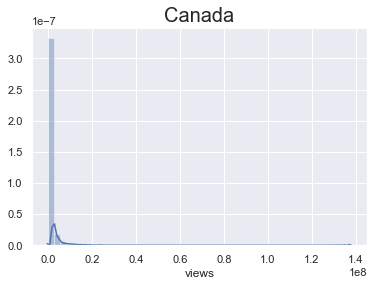

In [13]:
def PDF_views(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['views'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_views(select,i)

#### OBSERVATION
All countries have highly troublesome outliers.

# PDF of likes

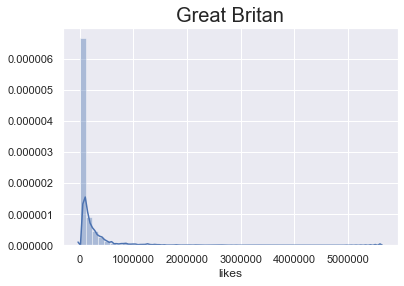

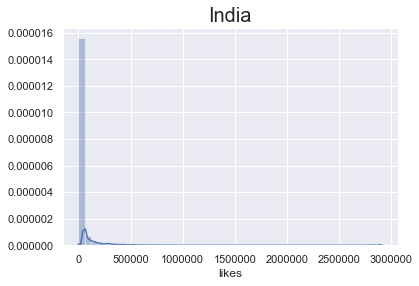

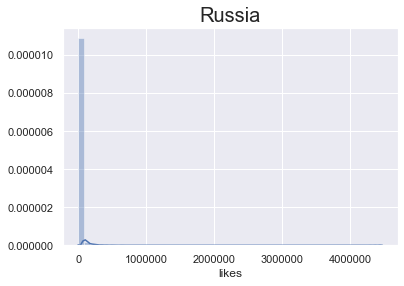

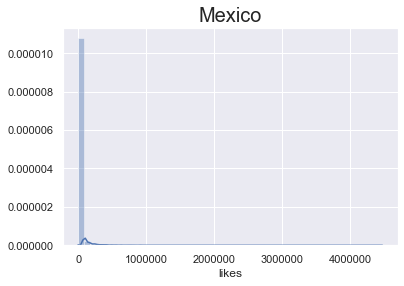

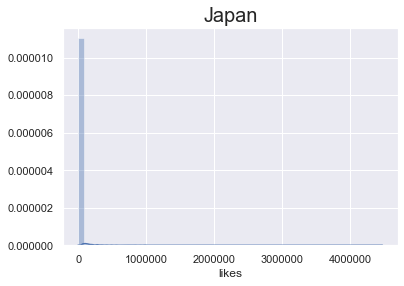

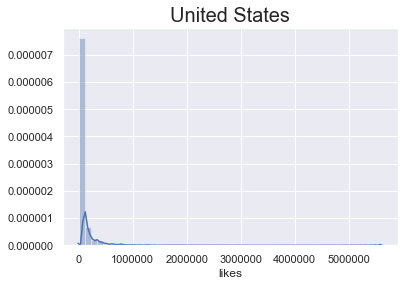

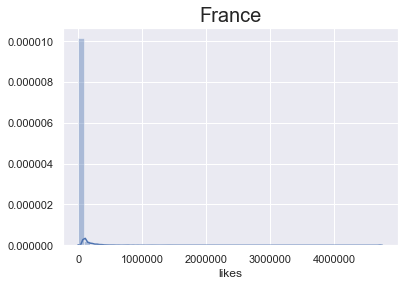

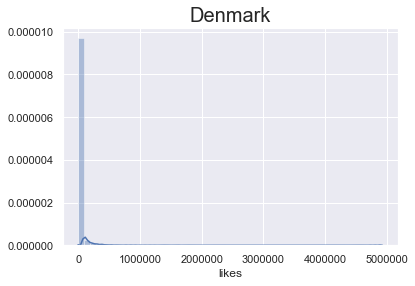

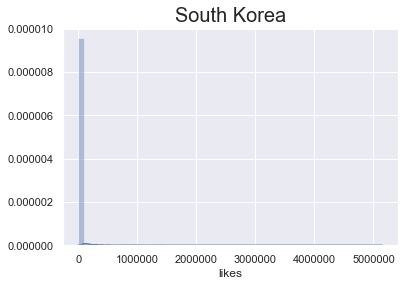

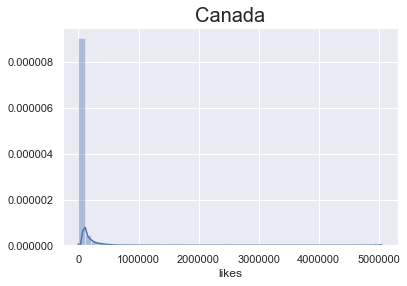

In [14]:
def PDF_likes(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['likes'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_likes(select,i)

#### OBSERVATION
All countries have highly troublesome outliers.

# PDF of dislikes

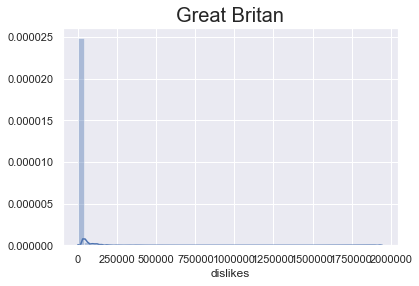

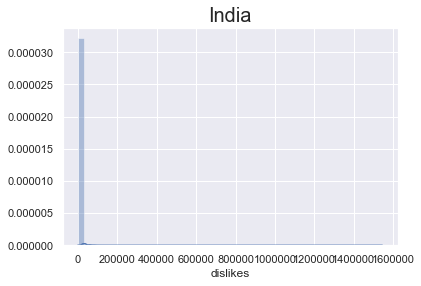

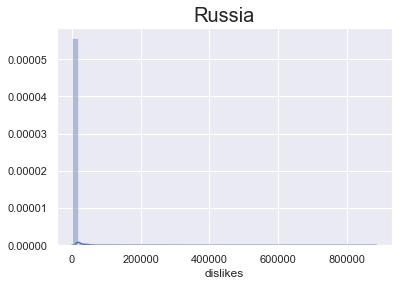

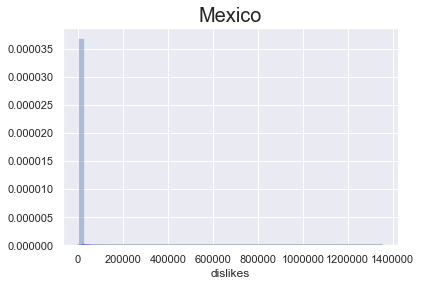

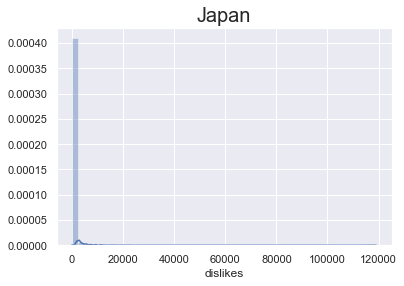

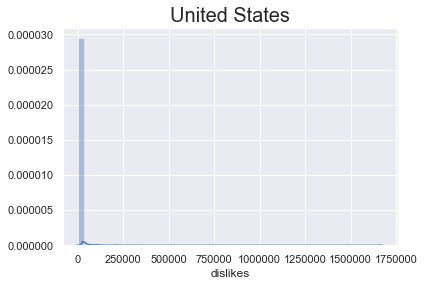

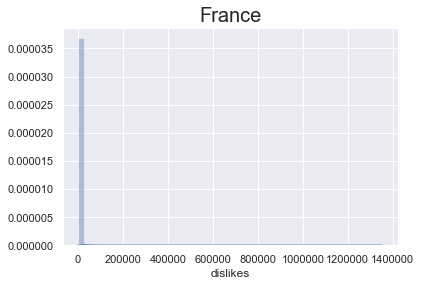

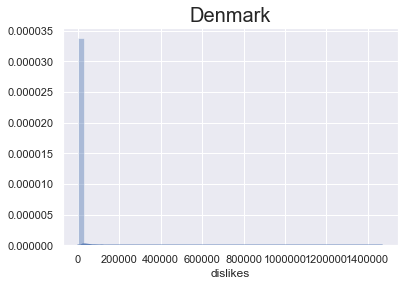

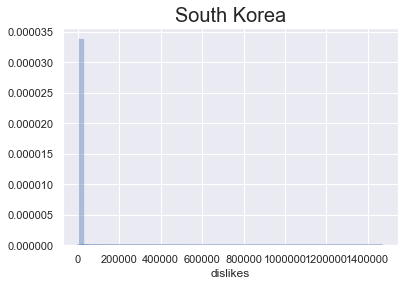

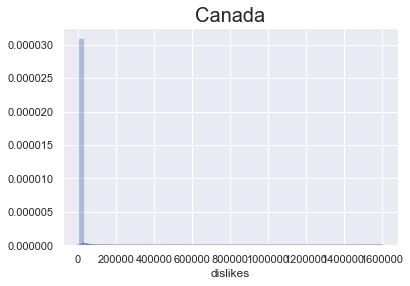

In [15]:
def PDF_dislikes(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['dislikes'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_dislikes(select,i)

#### OBSERVATION
All countries have highly troublesome outliers.

# PDF of Comment Count

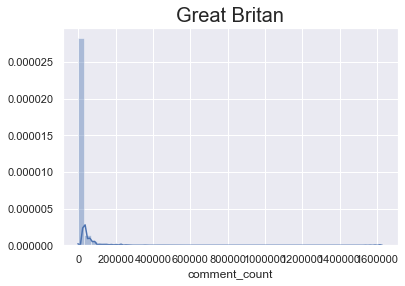

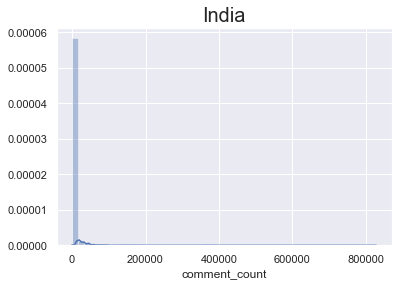

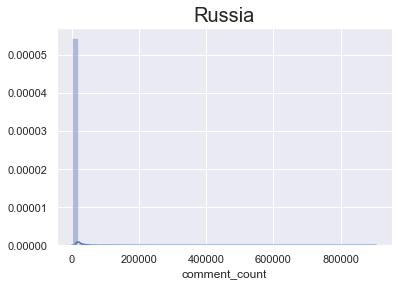

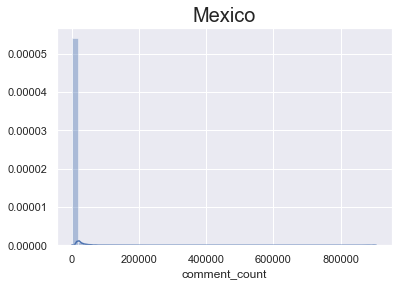

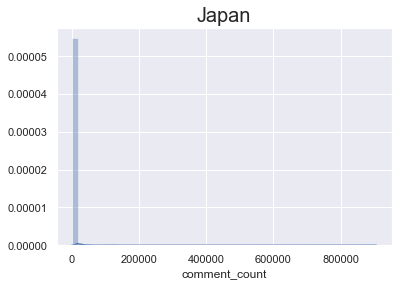

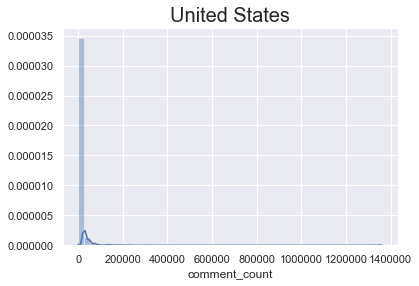

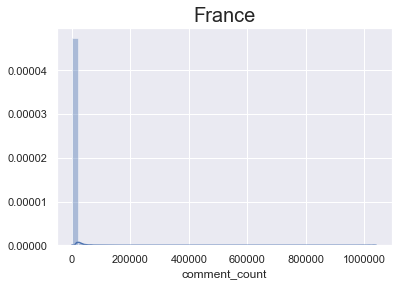

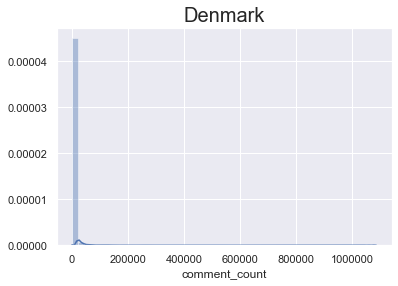

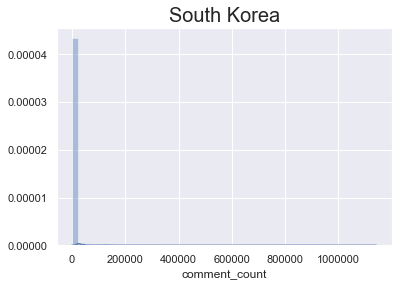

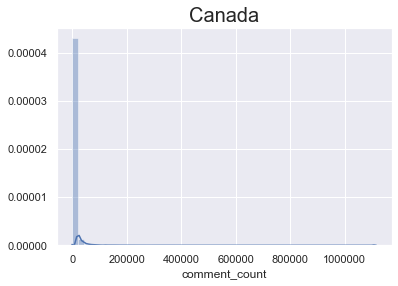

In [16]:
def PDF_comments(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['comment_count'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_comments(select,i)

#### OBSERVATION
All countries have highly troublesome outliers.

# PDF of time to trend

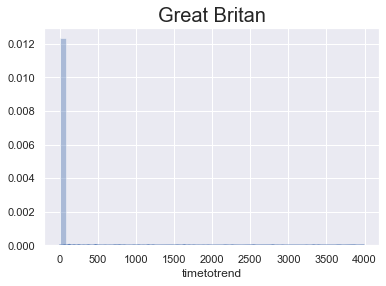

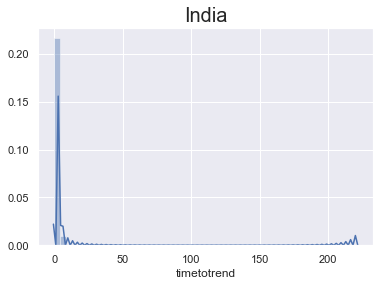

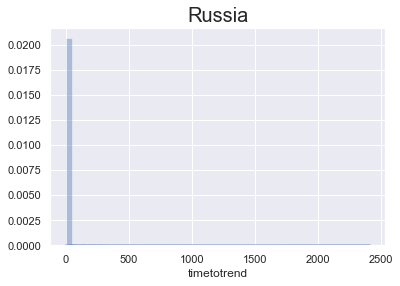

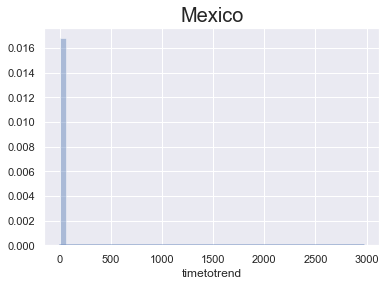

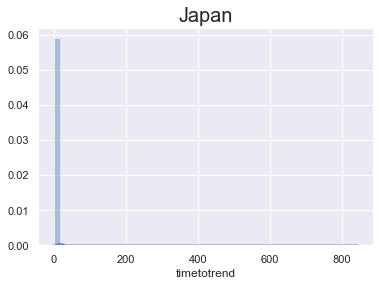

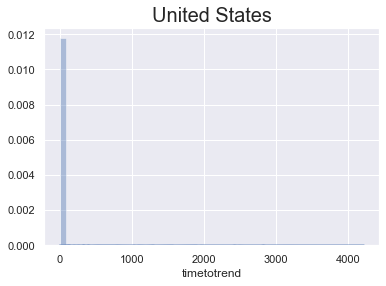

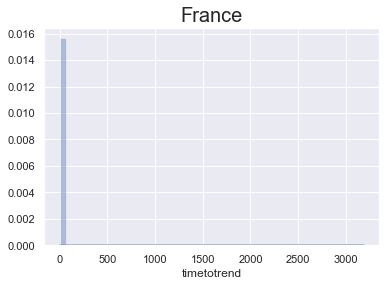

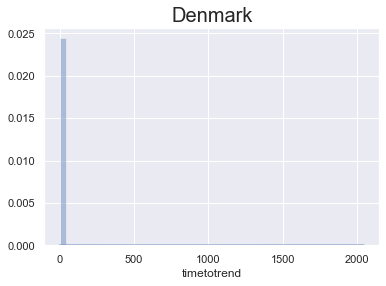

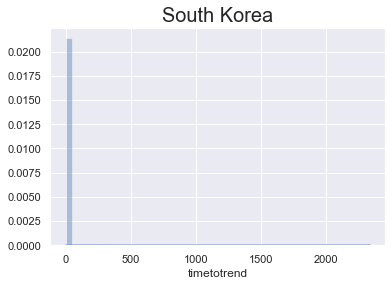

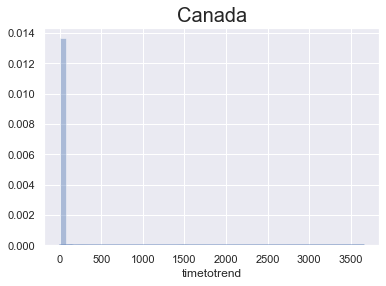

In [17]:
raw_data.timetotrend = raw_data.timetotrend.astype(int)
def PDF_trend(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['timetotrend'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_trend(select,i)

#### OBSERVATION
All countries have highly troublesome outliers.

# PDF of tag count

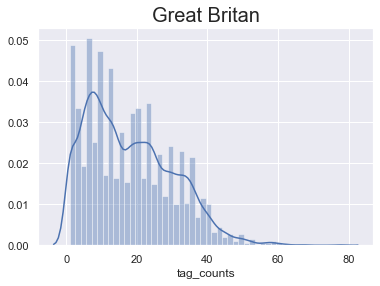

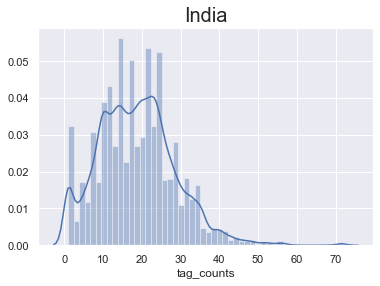

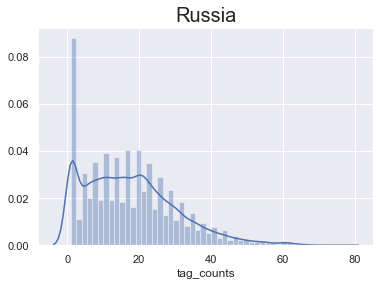

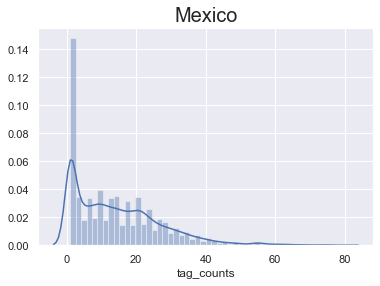

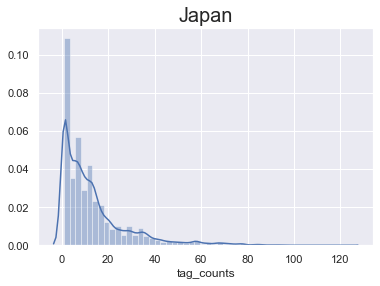

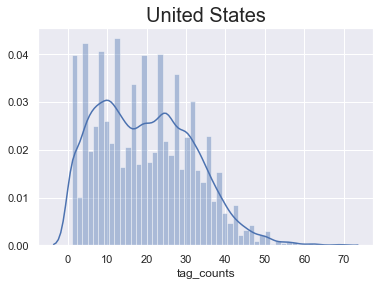

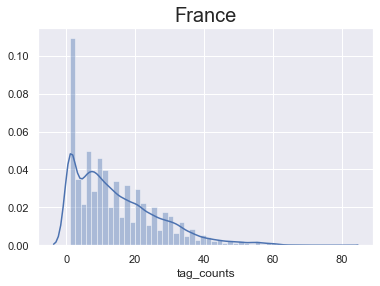

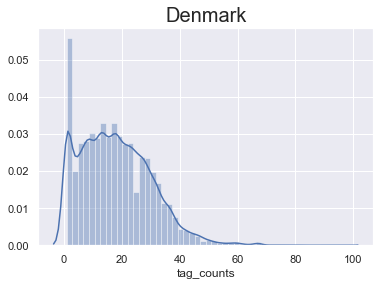

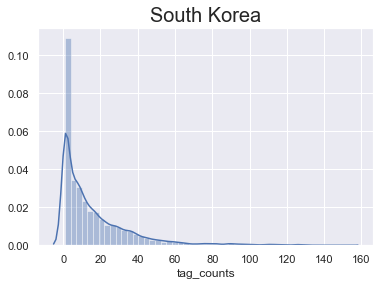

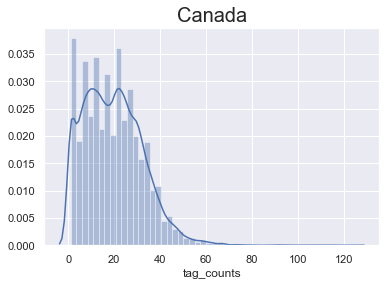

In [18]:
def PDF_tag(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['tag_counts'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_tag(select,i)

#### OBSERVATION
All countries don't have highly troublesome outliers.

## Dealing with Outliers

In [19]:
# Outliers are a great issue for OLS, thus we must deal with them in some way

## Views Outliers

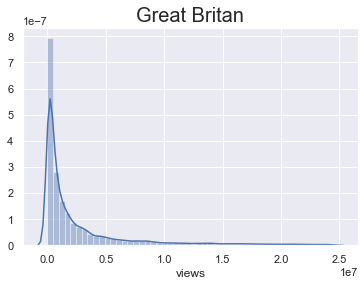

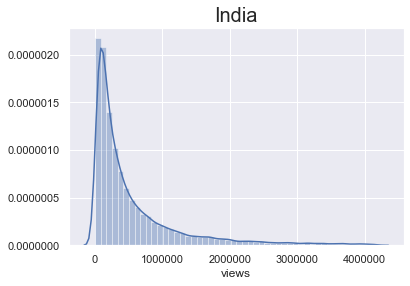

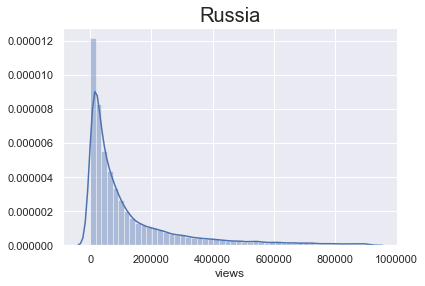

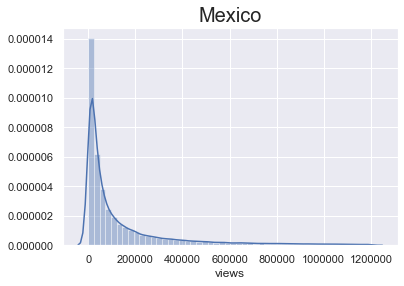

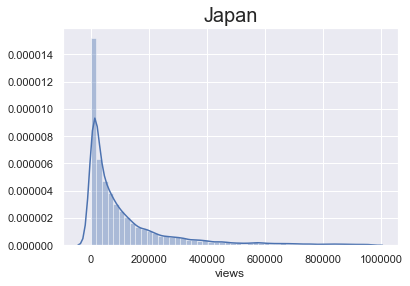

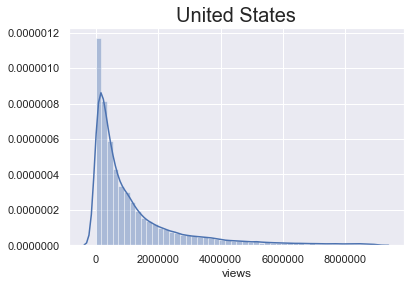

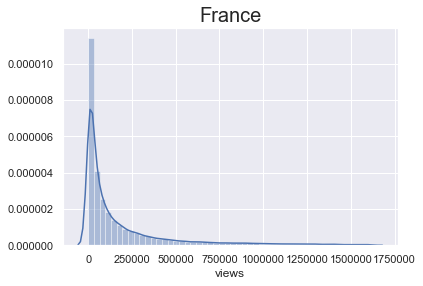

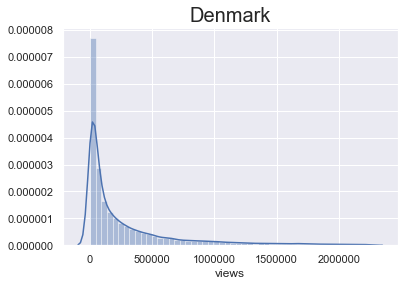

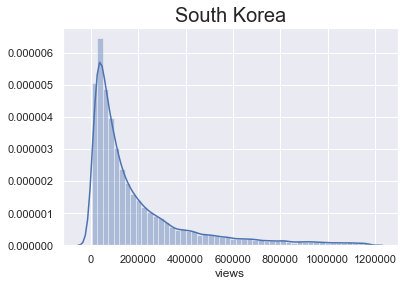

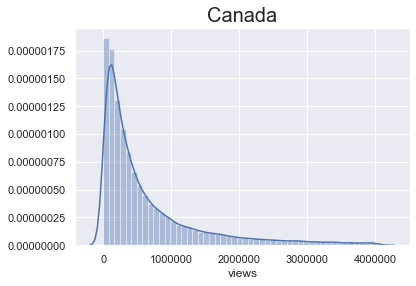

In [20]:
list_dataframe =[]

def outliers_views(select,i):
    select_temp =pd.DataFrame(columns=df.columns.values)
    q= select['views'].quantile(0.95)
    select_temp = select[select['views']<q]
    PDF_views(select_temp,i)
    list_dataframe.append(select_temp)
    
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    outliers_views(select,i)
    
data_1 = pd.concat(list_dataframe,ignore_index=True)

# Likes Outliers

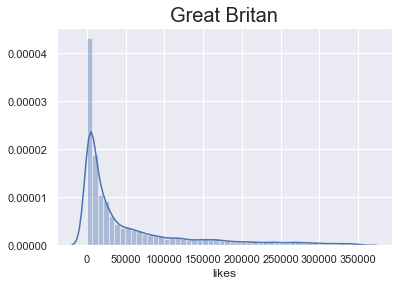

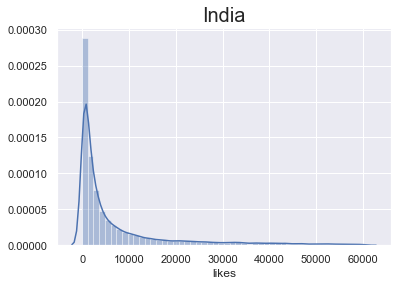

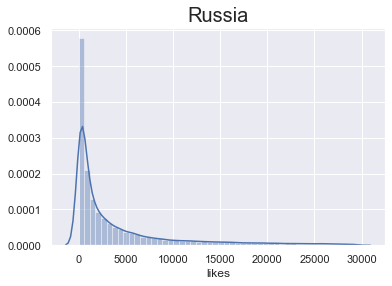

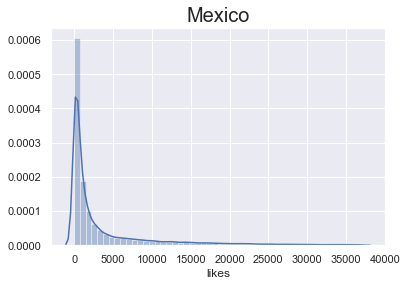

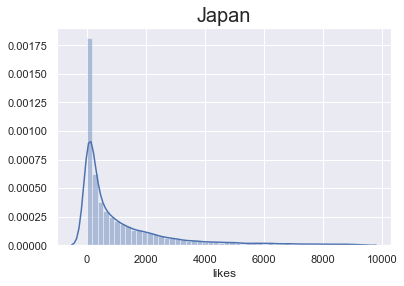

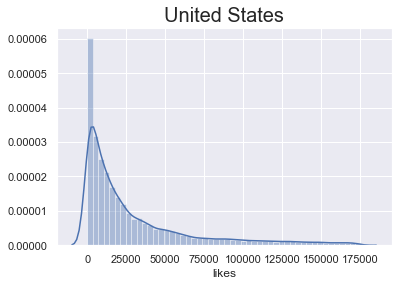

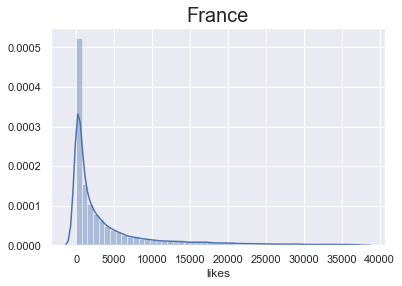

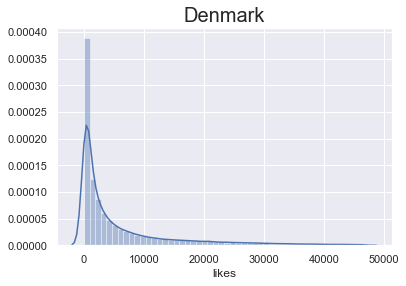

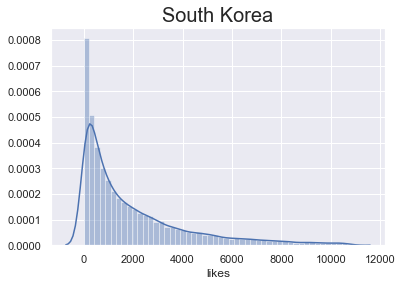

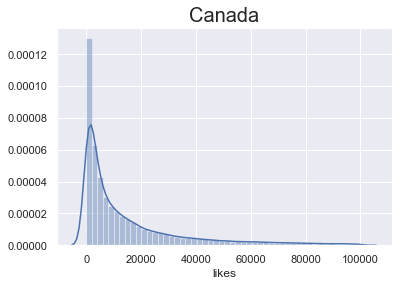

In [21]:
list_dataframe =[]

def outliers_likes(select,i):
    select_temp =pd.DataFrame(columns=df.columns.values)
    q= select['likes'].quantile(0.95)
    select_temp = select[select['likes']<q]
    PDF_likes(select_temp,i)
    list_dataframe.append(select_temp)
    
for i in countries:
    select = data_1.loc[data_1['region']==i] #Selects all rows of a particular country
    outliers_likes(select,i)
    
data_2 = pd.concat(list_dataframe,ignore_index=True)

## Dislikes Outliers

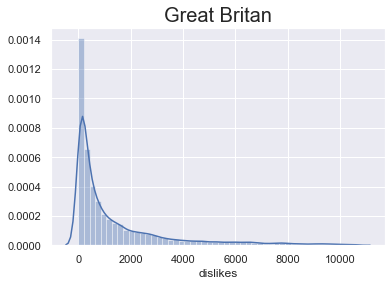

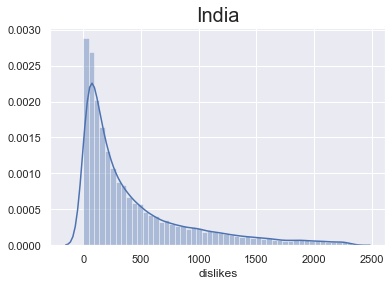

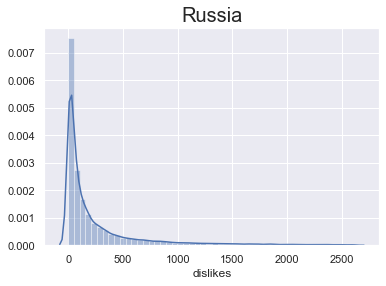

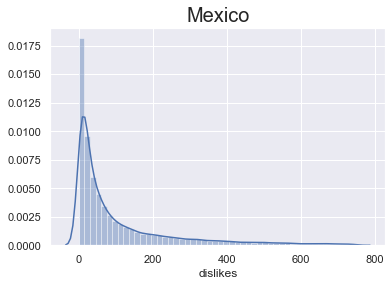

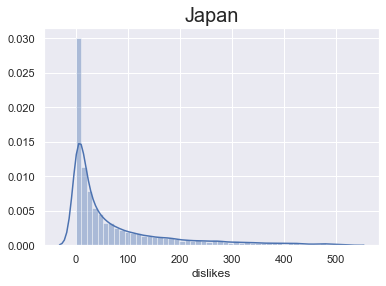

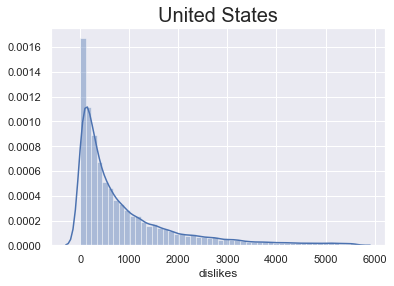

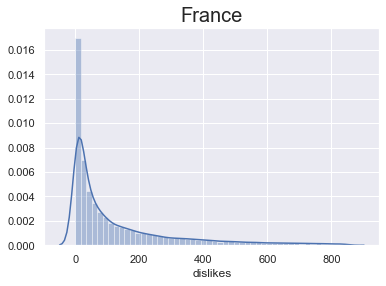

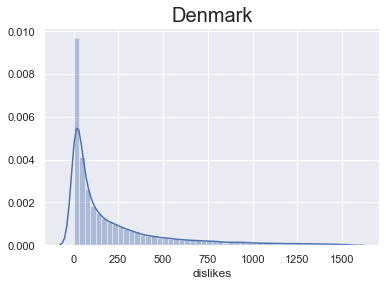

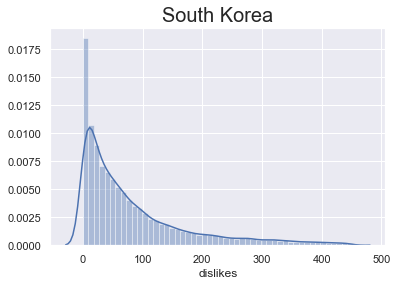

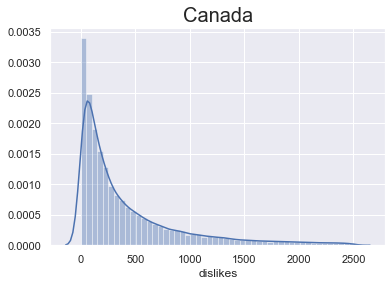

In [22]:
list_dataframe =[]

def outliers_dislikes(select,i):
    select_temp =pd.DataFrame(columns=df.columns.values)
    q= select['dislikes'].quantile(0.95) 
    select_temp = select[select['dislikes']<q]
    PDF_dislikes(select_temp,i)
    list_dataframe.append(select_temp)
    
for i in countries:
    select = data_2.loc[data_2['region']==i] #Selects all rows of a particular country
    outliers_dislikes(select,i)
    
data_3 = pd.concat(list_dataframe,ignore_index=True)

## Comment Count Outliers

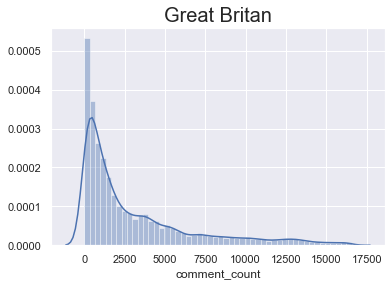

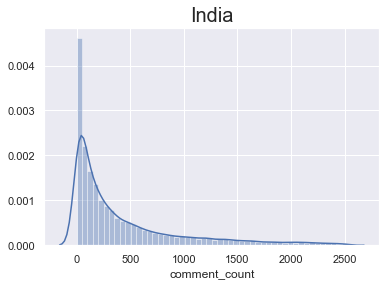

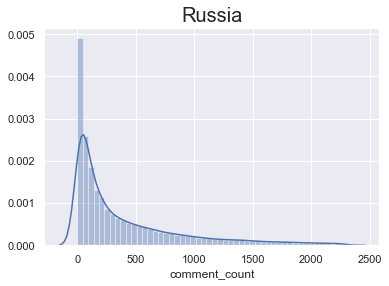

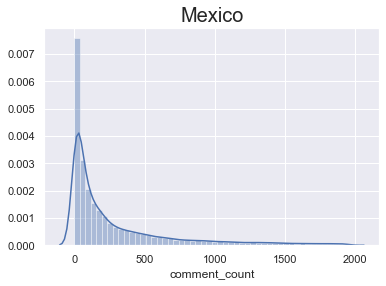

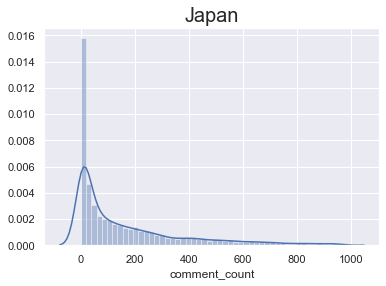

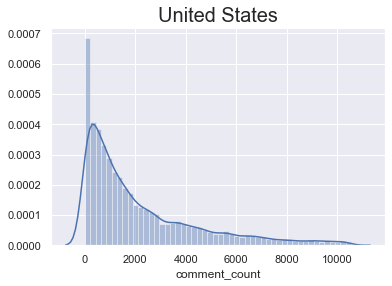

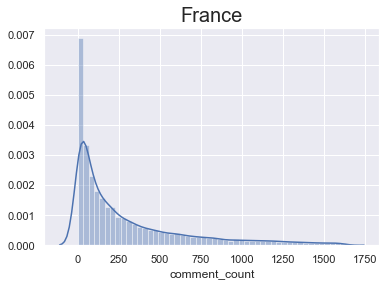

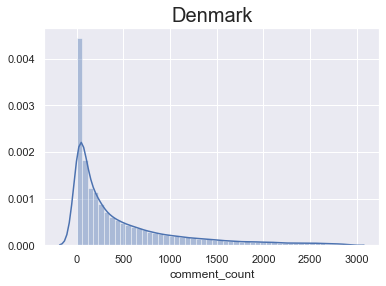

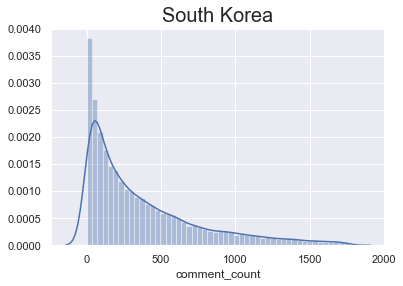

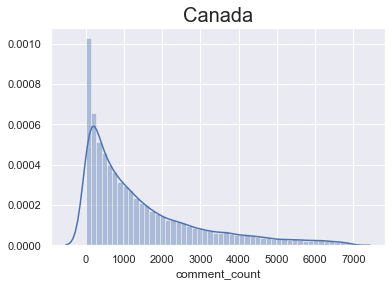

In [23]:
list_dataframe =[]

def outliers_comments(select,i):
    select_temp =pd.DataFrame(columns=df.columns.values)
    q= select['comment_count'].quantile(0.95)
    select_temp = select[select['comment_count']<q]
    PDF_comments(select_temp,i)
    list_dataframe.append(select_temp)
    
for i in countries:
    select = data_3.loc[data_3['region']==i] #Selects all rows of a particular country
    outliers_comments(select,i)
    
data_4 = pd.concat(list_dataframe,ignore_index=True)

# TimetoTrend Outliers

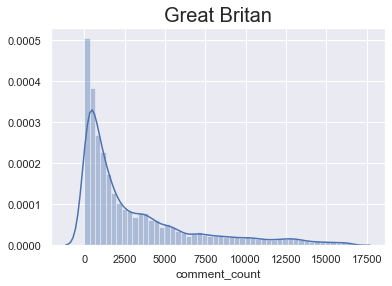

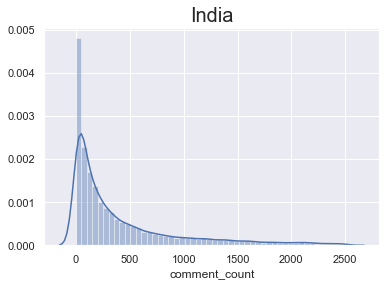

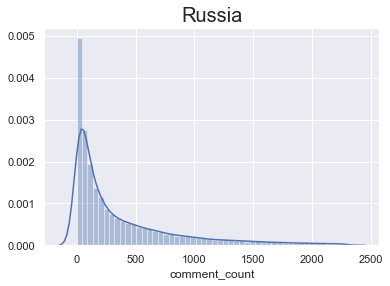

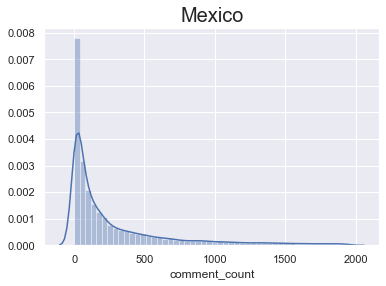

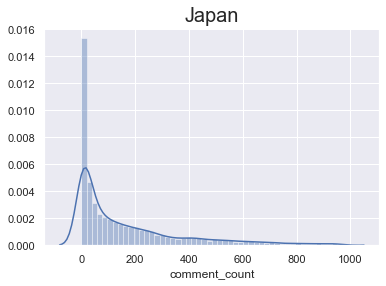

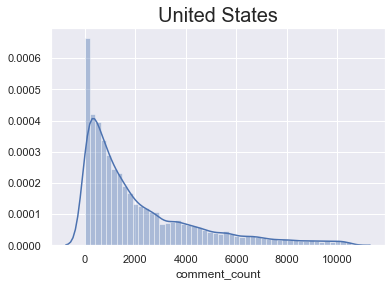

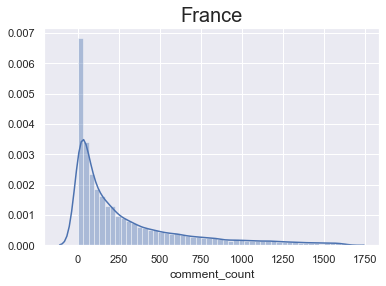

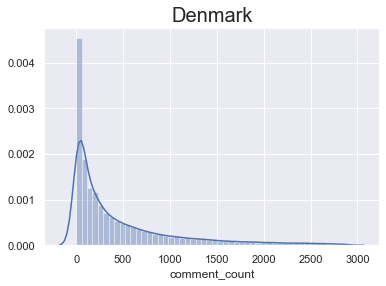

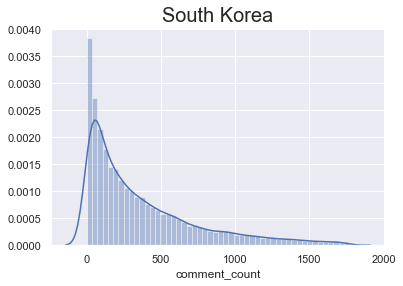

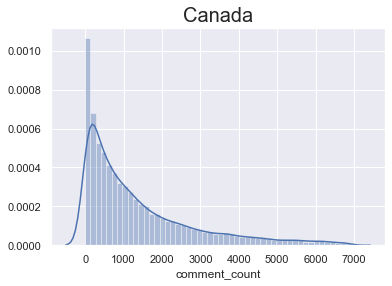

In [24]:
list_dataframe =[]

def outliers_trend(select,i):
    select_temp =pd.DataFrame(columns=df.columns.values)
    q= select['timetotrend'].quantile(0.95)
    select_temp = select[select['timetotrend']<q]
    PDF_comments(select_temp,i)
    list_dataframe.append(select_temp)
    
for i in countries:
    select = data_4.loc[data_4['region']==i] #Selects all rows of a particular country
    outliers_trend(select,i)
    
data_5 = pd.concat(list_dataframe,ignore_index=True)

In [25]:
data_5.describe(include='all')

,title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,region,timetotrend,hour,tag_counts
count,279514,279514.00,279514.00,279514.00,279514.00,279514.00,279514.00,279514.00,279514.00,279514,279514.00,279514.00,279514.00
unique,166121,nan,nan,nan,nan,nan,nan,nan,nan,10,nan,nan,nan
top,Kelly Clarkson - Meaning of Life [Official Video],nan,nan,nan,nan,nan,nan,nan,nan,United States,nan,nan,nan
freq,48,nan,nan,nan,nan,nan,nan,nan,nan,31610,nan,nan,nan
mean,NaN,20.57,388175.15,9960.81,365.88,956.62,0.02,0.02,0.00,NaN,2.68,12.60,17.03
std,NaN,6.98,991322.52,24849.61,791.52,1821.10,0.16,0.15,0.02,NaN,4.05,6.28,13.28
min,NaN,1.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,1.00
25%,NaN,20.00,32439.50,462.00,28.00,74.00,0.00,0.00,0.00,NaN,1.00,8.00,7.00
50%,NaN,24.00,107573.50,2030.00,104.00,307.00,0.00,0.00,0.00,NaN,1.00,14.00,15.00
75%,NaN,24.00,335207.25,7864.75,341.00,966.00,0.00,0.00,0.00,NaN,2.00,17.00,25.00


# Checking the Linearity

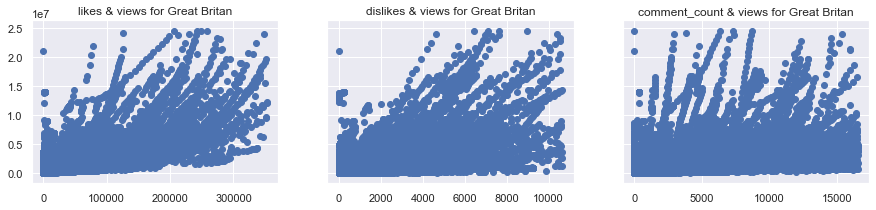

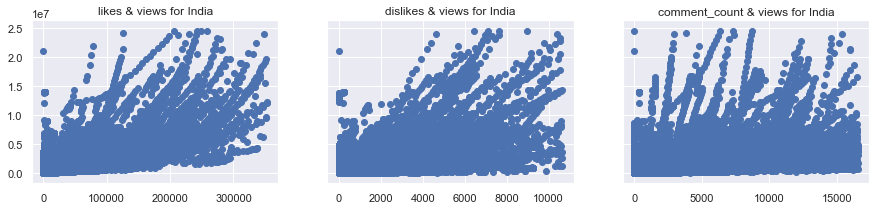

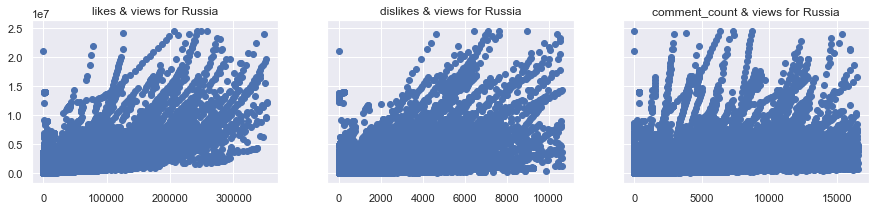

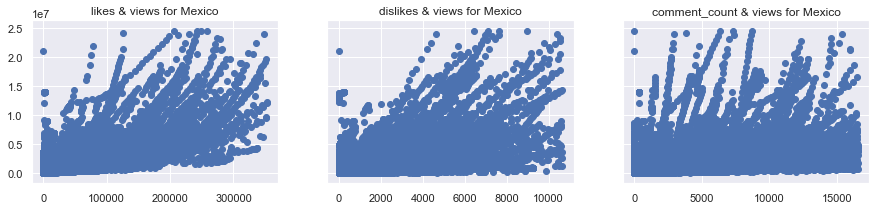

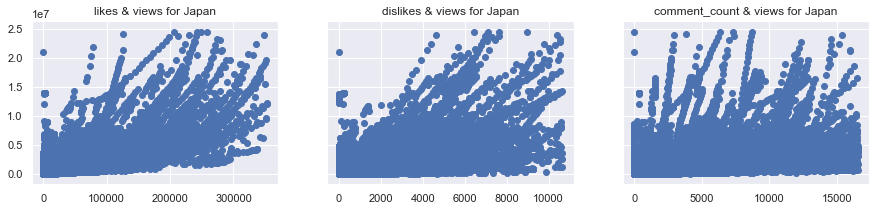

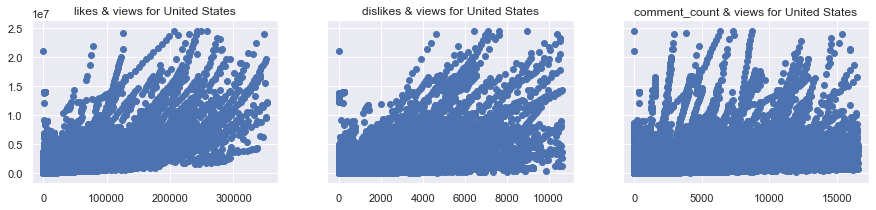

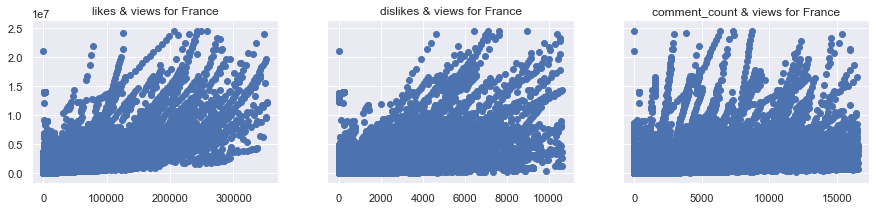

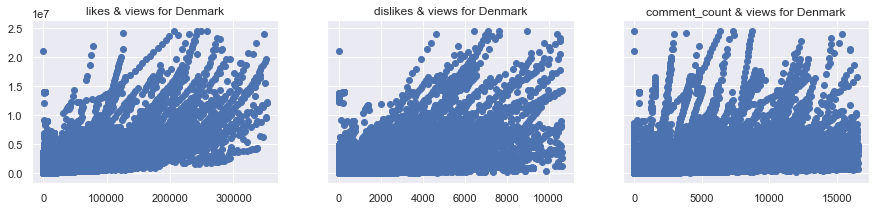

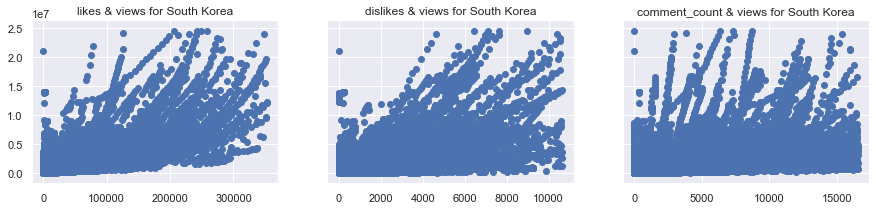

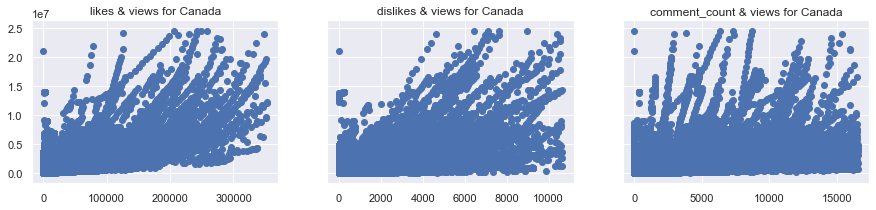

In [26]:
def plots(select,i):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'views' as y
    ax1.scatter(data_5['likes'],data_5['views'])
    ax1.set_title('likes & views for ' + i)
    ax2.scatter(data_5['dislikes'],data_5['views'])
    ax2.set_title('dislikes & views for ' + i)
    ax3.scatter(data_5['comment_count'],data_5['views'])
    ax3.set_title('comment_count & views for ' + i)
    plt.show()
    
for i in countries:
    select = data_5.loc[data_5['region']==i] #Selects all rows of a particular country
    plots(select,i)


#### OBSERVATION :
There is no apparent linear relationship between the X & Y.

## Fixing the above problem

In [27]:
data_5 = data_5[(data_5[['views','likes','dislikes','comment_count']] != 0).all(axis=1)]

In [28]:
data_5.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,timetotrend,hour,tag_counts
count,264907.00,264907.00,264907.00,264907.00,264907.00,264907.00,264907.00,264907.00,264907.00,264907.00,264907.00
mean,20.53,397254.01,10394.70,378.01,1003.46,0.00,0.00,0.00,2.73,12.65,17.25
std,6.99,1000885.71,25334.51,799.23,1855.87,0.00,0.00,0.02,4.10,6.25,13.21
min,1.00,117.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,20.00,35262.50,564.00,33.00,92.00,0.00,0.00,0.00,1.00,8.00,7.00
50%,24.00,113047.00,2252.00,114.00,341.00,0.00,0.00,0.00,1.00,14.00,15.00
75%,24.00,347040.00,8427.00,356.00,1026.00,0.00,0.00,0.00,2.00,17.00,25.00
max,43.00,24475485.00,353017.00,10661.00,16578.00,0.00,0.00,1.00,31.00,23.00,152.00


In [29]:
# Let's transform all attributes with a log transformation
log_views = np.log(data_5['views'])
log_likes = np.log(data_5['likes'])
log_dislikes = np.log(data_5['dislikes'])
log_comments = np.log(data_5['comment_count'])

# Then we add it to our data frame
data_5['log_views'] = log_views
data_5['log_likes'] = log_likes
data_5['log_dislikes'] = log_dislikes
data_5['log_comments'] = log_comments

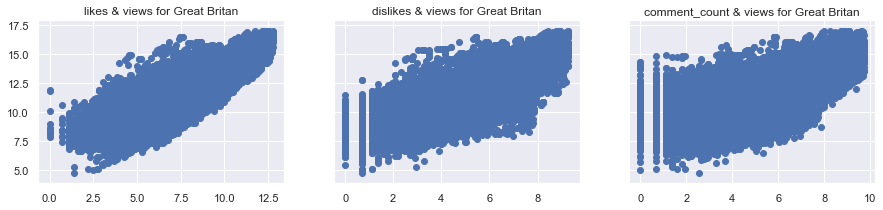

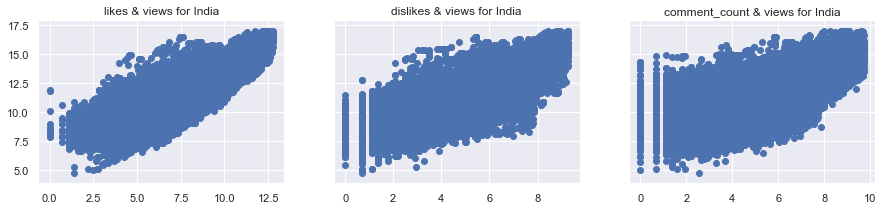

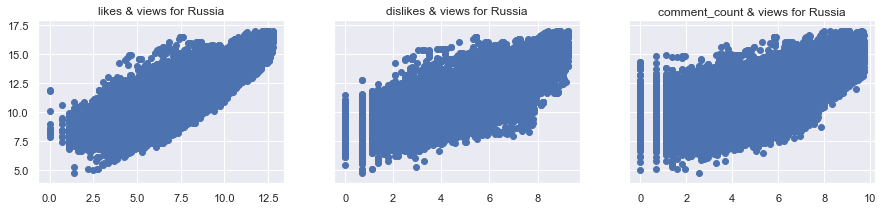

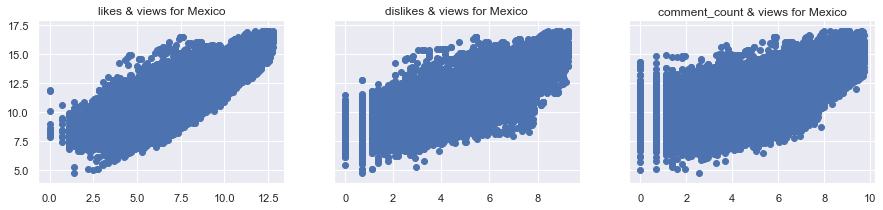

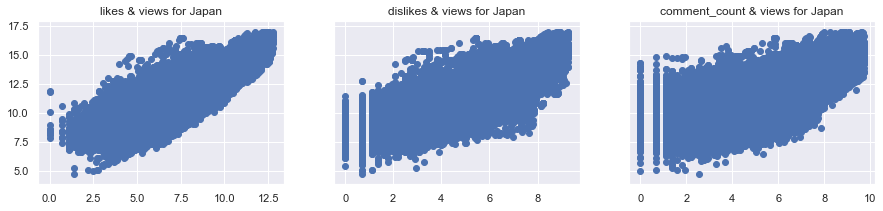

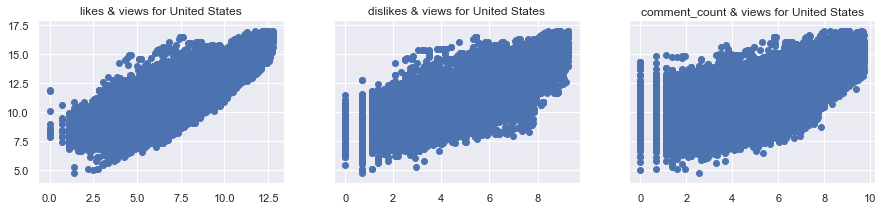

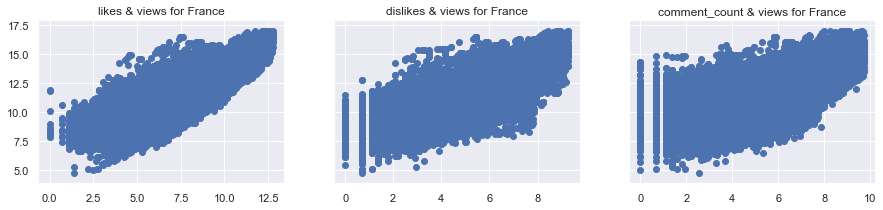

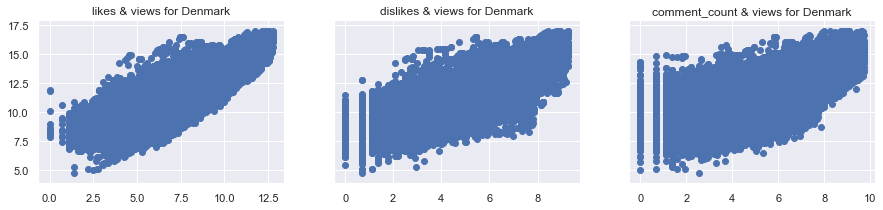

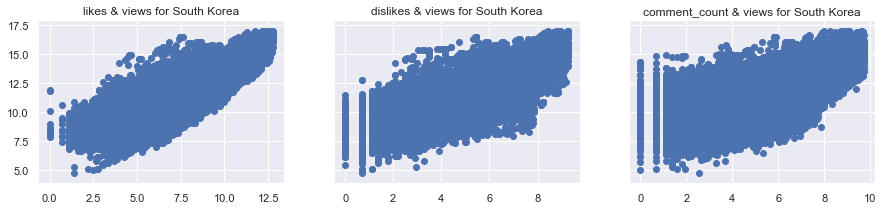

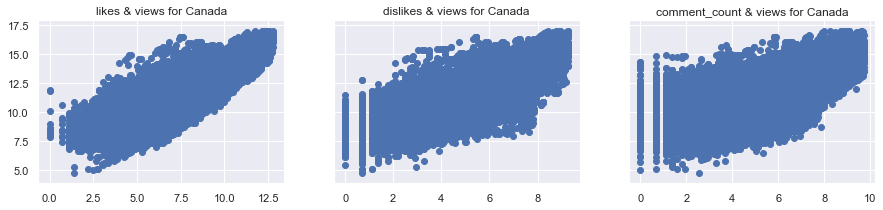

In [30]:
def log_plots(select,i):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'views' as y
    ax1.scatter(data_5['log_likes'],data_5['log_views'])
    ax1.set_title('likes & views for ' + i)
    ax2.scatter(data_5['log_dislikes'],data_5['log_views'])
    ax2.set_title('dislikes & views for ' + i)
    ax3.scatter(data_5['log_comments'],data_5['log_views'])
    ax3.set_title('comment_count & views for ' + i)
    plt.show()
    
for i in countries:
    select = data_5.loc[data_5['region']==i] #Selects all rows of a particular country
    log_plots(select,i)

#### OBSERVATION : 
The scatter plots now show a good linear relationship.

In [31]:
# Since we will be using the log variables, we can drop the old ones
data_cleaned = data_5.drop(['views' , 'likes' , 'dislikes' , 'comment_count'],axis=1)

In [32]:
data_cleaned = data_cleaned.drop('title' , axis=1)

In [33]:
data_cleaned

,category_id,comments_disabled,ratings_disabled,video_error_or_removed,region,timetotrend,hour,tag_counts,log_views,log_likes,log_dislikes,log_comments
0,28,0,0,0,Great Britan,7,16,14,13.41,8.78,6.57,7.82
1,25,0,0,0,Great Britan,7,17,44,10.87,6.91,3.93,4.88
2,22,0,0,0,Great Britan,12,20,6,12.98,8.52,5.20,5.28
3,22,0,0,0,Great Britan,3,7,27,13.48,8.60,7.86,8.28
4,22,0,0,0,Great Britan,8,16,16,10.73,7.58,3.56,4.86
5,24,0,0,0,Great Britan,7,6,1,12.95,9.85,7.16,8.36
6,24,0,0,0,Great Britan,9,18,21,13.00,7.90,6.39,6.89
7,24,0,0,0,Great Britan,10,23,11,14.93,4.62,4.73,4.23
8,10,0,0,0,Great Britan,26,14,4,15.60,12.26,8.33,9.62
9,23,0,0,0,Great Britan,8,15,11,14.30,11.06,7.18,8.46


In [34]:
data_cleaned.to_csv(r'data_cleaned.csv', index = False)